<a href="https://colab.research.google.com/github/worklifesg/Computer-Vision-Algorithms-and-Projects/blob/main/3-Siamese%20Networks/3_predict_siamese_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align='center'> Comparing Images using Siamese Networks </h2>

#### 1. Import Libraries

In [1]:
import config
import utils

from tensorflow.keras.models import load_model
from imutils.paths import list_images

import matplotlib.pyplot as plt
import numpy as np

import cv2

#### 2. Loading Test Images and Model

In [2]:
print("[INFO] loading test dataset...")
testImagePaths = list(list_images('/content/test_images'))
np.random.seed(42)
pairs = np.random.choice(testImagePaths, size=(10, 2))

[INFO] loading test dataset...


In [3]:
print("[INFO] loading siamese model...")
model = load_model(config.model_path)

[INFO] loading siamese model...


#### 3. Comparing images for similarity using siamese networks


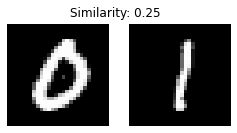

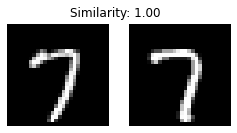

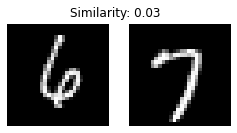

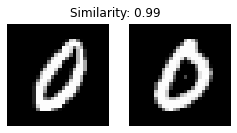

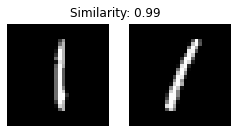

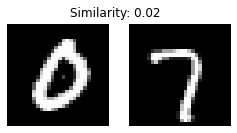

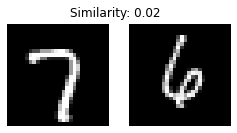

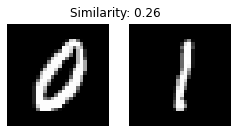

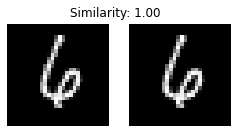

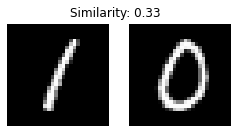

<Figure size 432x288 with 0 Axes>

In [6]:
# loop over all image pairs
for (i, (pathA, pathB)) in enumerate(pairs):
	# load both the images and convert them to grayscale
	imageA = cv2.imread(pathA, 0)
	imageB = cv2.imread(pathB, 0)
	# create a copy of both the images for visualization purpose
	origA = imageA.copy()
	origB = imageB.copy()
	# add channel a dimension to both the images
	imageA = np.expand_dims(imageA, axis=-1)
	imageB = np.expand_dims(imageB, axis=-1)
	# add a batch dimension to both images
	imageA = np.expand_dims(imageA, axis=0)
	imageB = np.expand_dims(imageB, axis=0)
	# scale the pixel values to the range of [0, 1]
	imageA = imageA / 255.0
	imageB = imageB / 255.0
	# use our siamese model to make predictions on the image pair,
	# indicating whether or not the images belong to the same class
	preds = model.predict([imageA, imageB])
	proba = preds[0][0]

  # initialize the figure
	fig = plt.figure("Pair #{}".format(i + 1), figsize=(4, 2))
	plt.suptitle("Similarity: {:.2f}".format(proba))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(origA, cmap=plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(origB, cmap=plt.cm.gray)
	plt.axis("off")
	# show the plot
	plt.show()

plt.savefig('prediction.png')